**CPE 311 - Computational Thinking with Python**

Gwyneth D. Esperat

CPE22S3

April 01, 2024

Engr. Roman M. Richard

# Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

# Resources:

Download the following datasets:

* fb_stock_prices_2018.csv
* earthquakes-1.csv

# Procedures:

* 9.4 Introduction to Seaborn
* 9.5 Formatting Plots
* 9.6 Customizing Visualizations

# 9.4 Introduction to Seaborn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes.csv')

In [2]:
quakes.assign(
time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
"parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<Axes: xlabel='magType', ylabel='mag'>

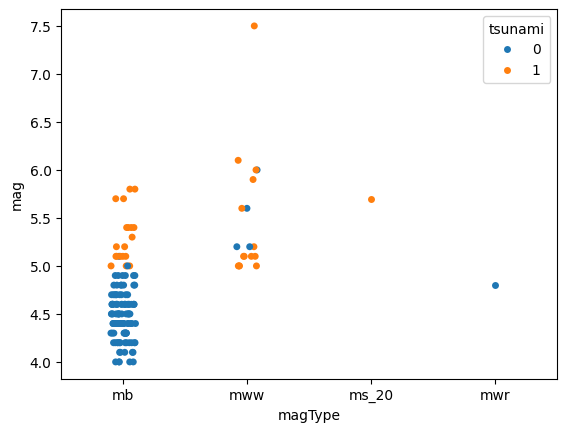

In [3]:
sns.stripplot(
x='magType',
y='mag',
hue='tsunami',
data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


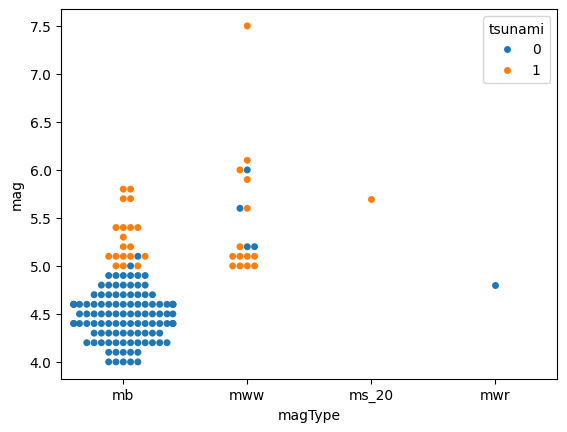

In [4]:
sns.swarmplot(
x='magType',
y='mag',
hue='tsunami',
data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: >

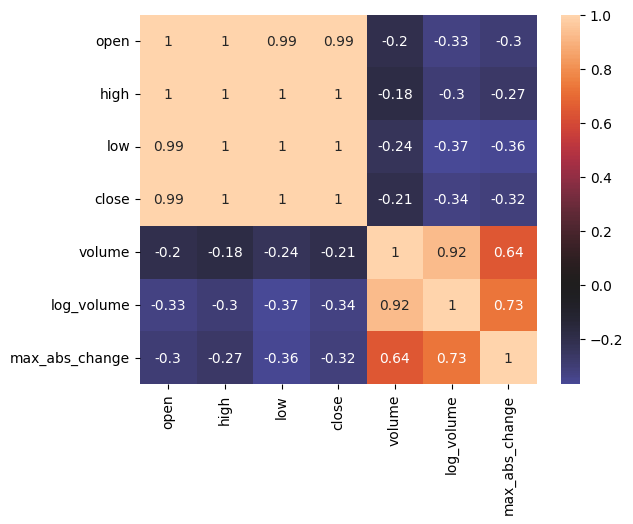

In [5]:
sns.heatmap(
fb.sort_index().assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).corr(),

annot=True, center=0
)

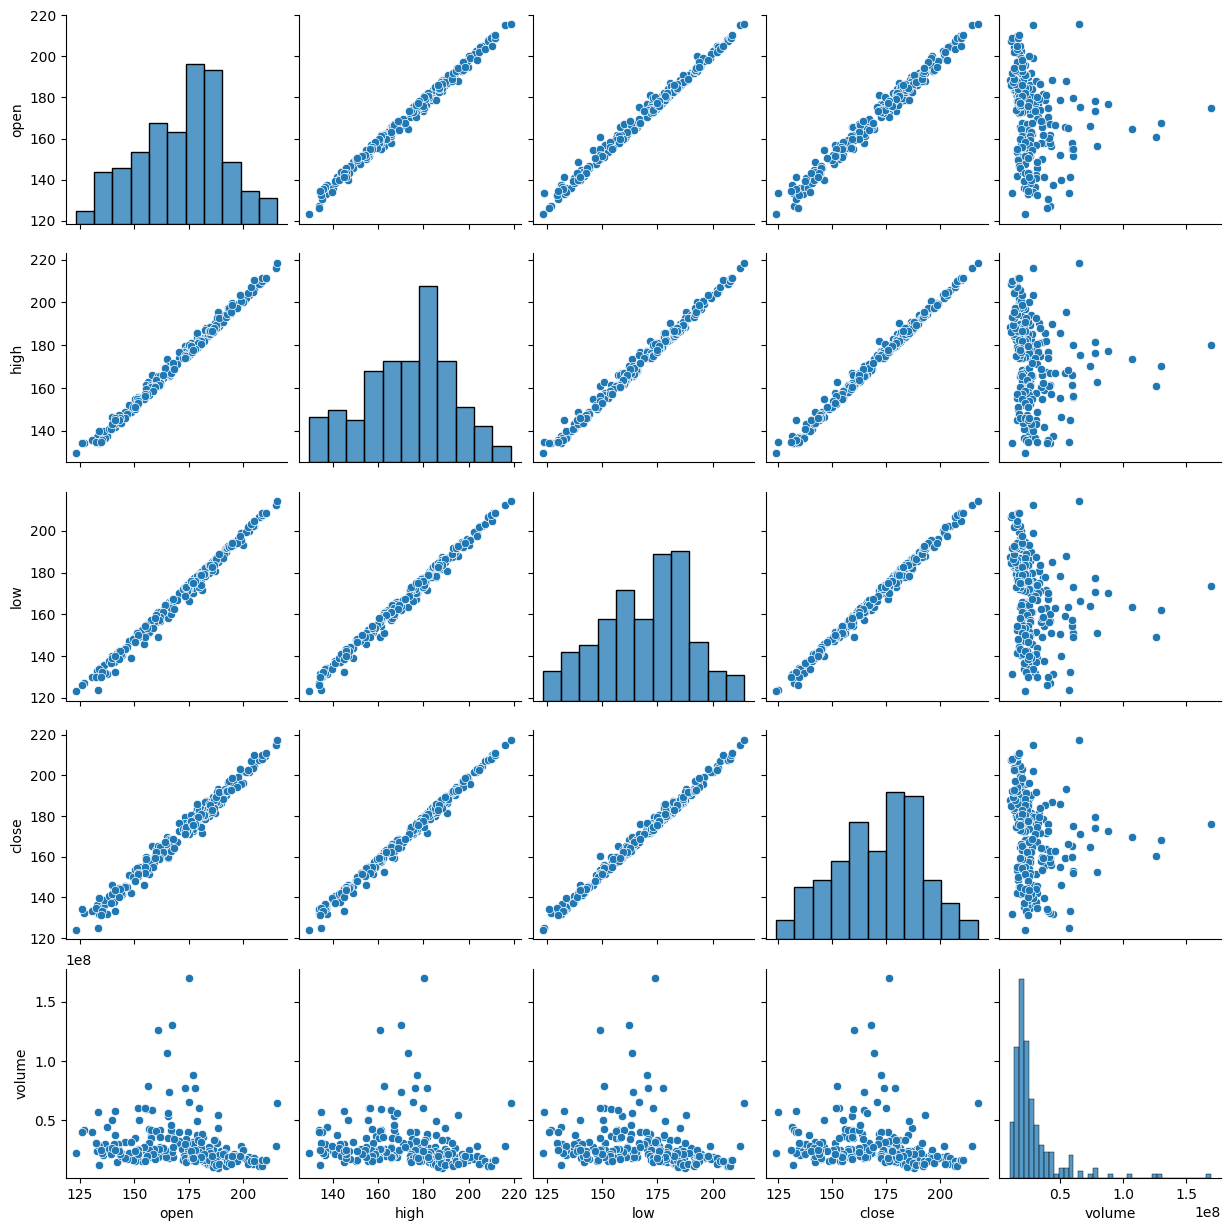

In [6]:
sns.pairplot(fb)

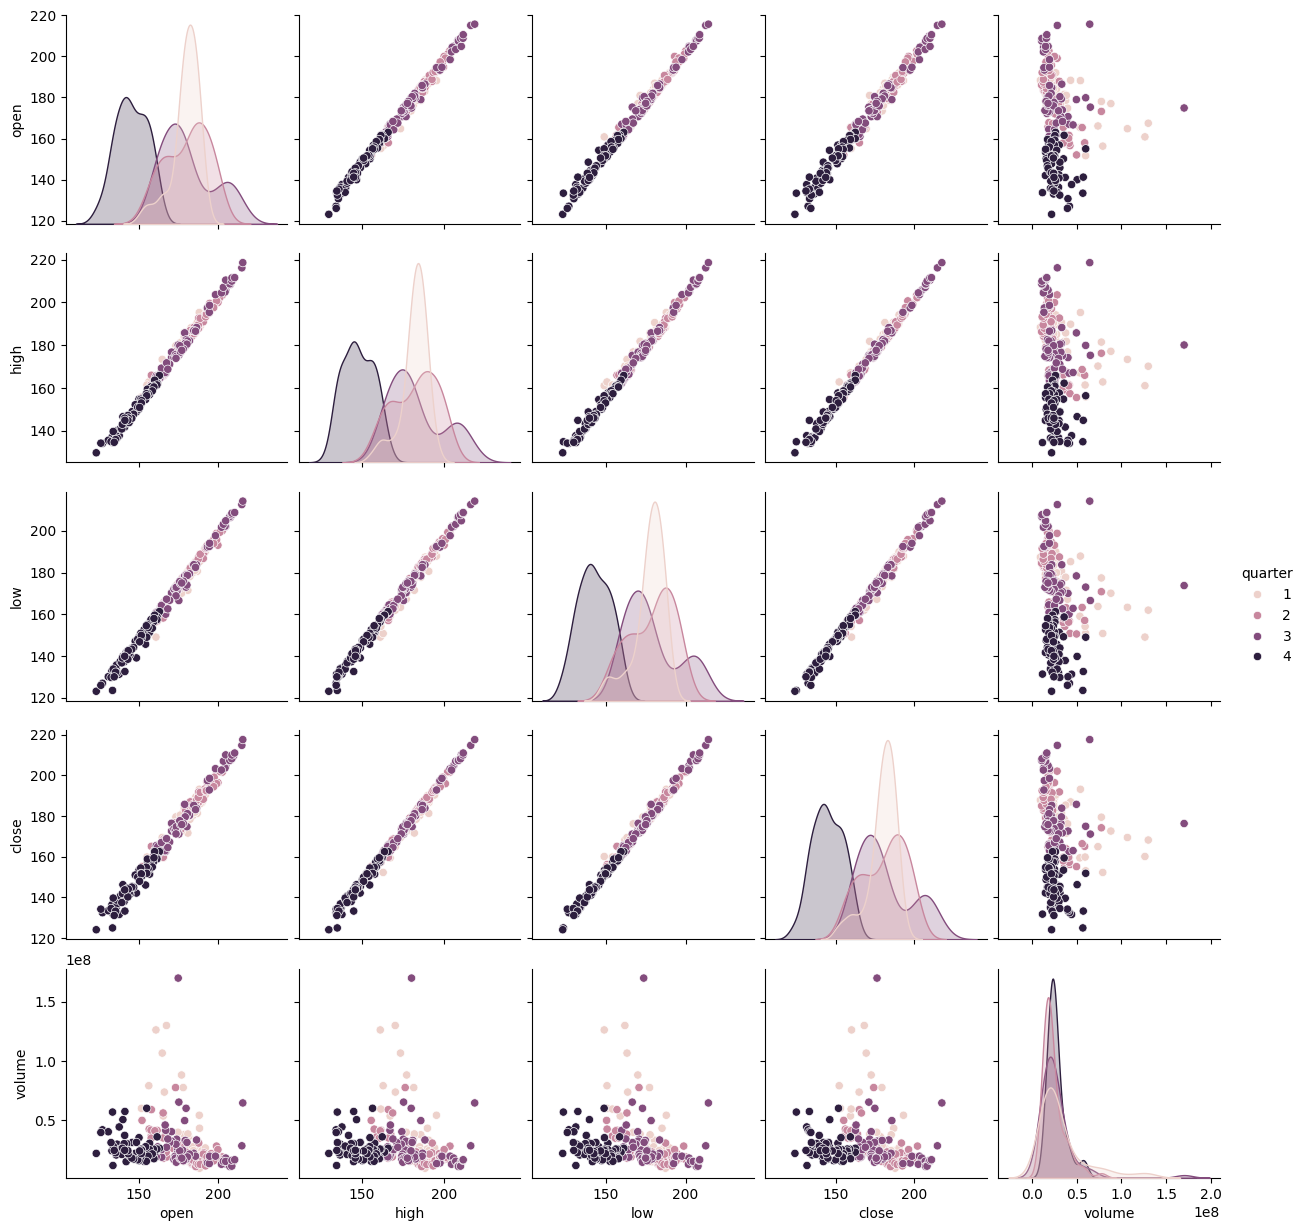

In [7]:
sns.pairplot(
fb.assign(quarter=lambda x: x.index.quarter),
diag_kind='kde',
hue='quarter'
)

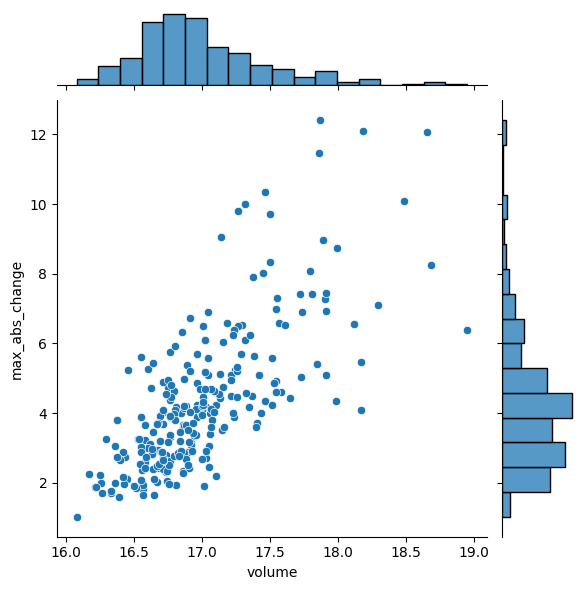

In [8]:
sns.jointplot(
x='volume',
y='max_abs_change',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

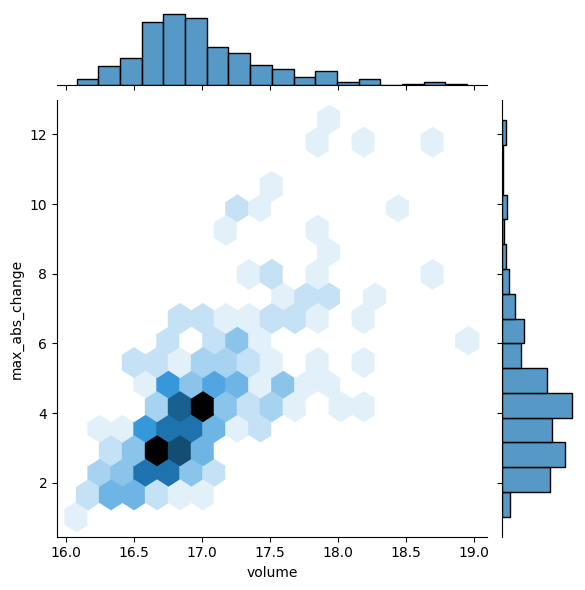

In [9]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='hex',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

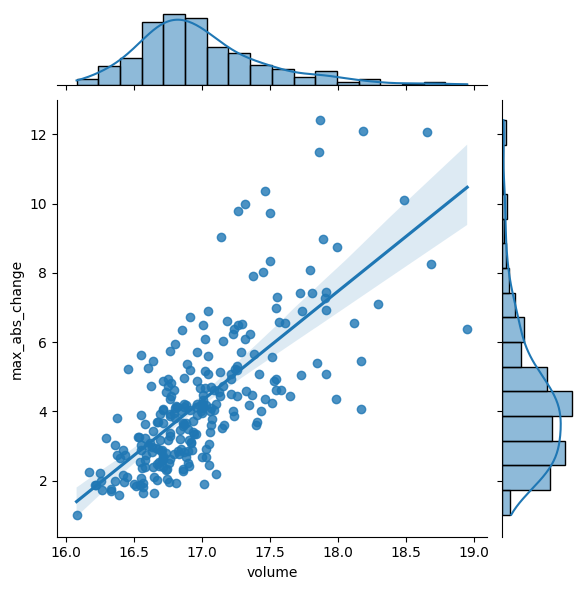

In [10]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='reg',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

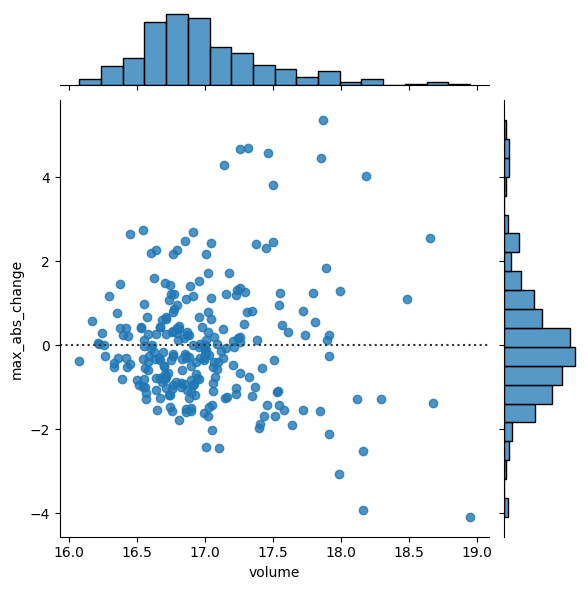

In [11]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='resid',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

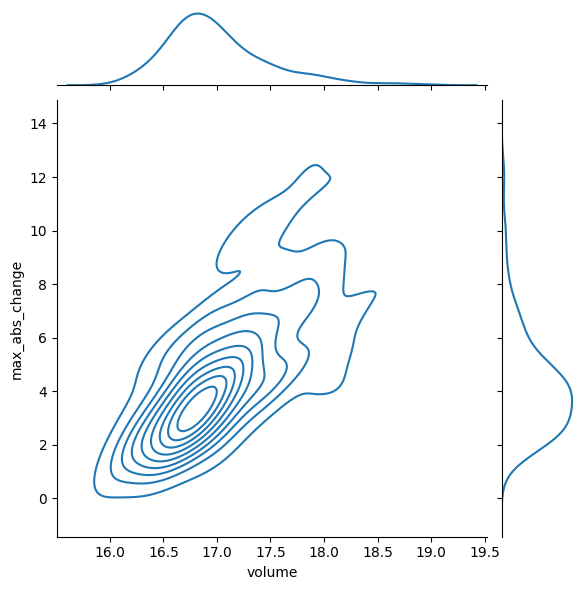

In [12]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='kde',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

In [13]:
fb_reg_data = fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [15]:
import itertools

iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')

# Reset the iterator
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')


-->I'm an iterator
This printed once because the iterator has been exhausted
-->I'm an iterator


In [16]:
import itertools

iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')


-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


In [19]:
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

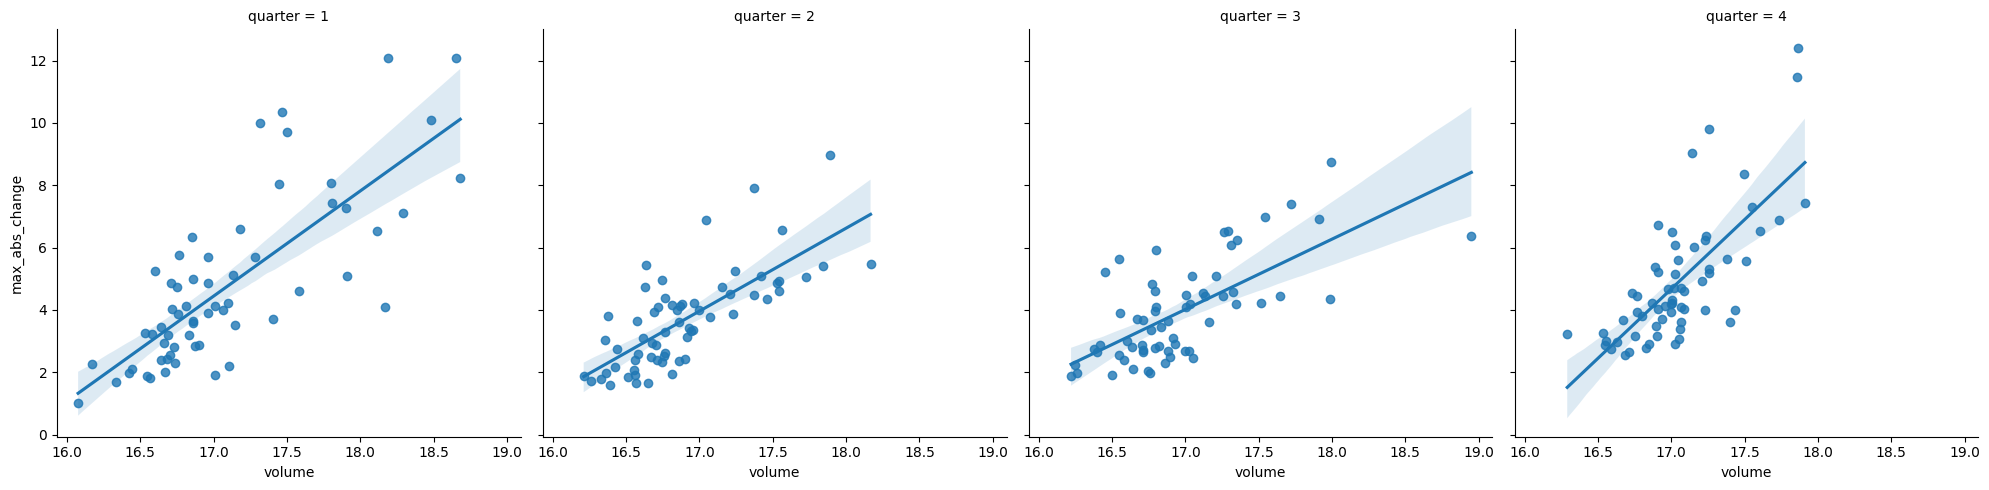

In [20]:
sns.lmplot(
x='volume',
y='max_abs_change',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low,
quarter=lambda x: x.index.quarter
),
col='quarter'
)


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

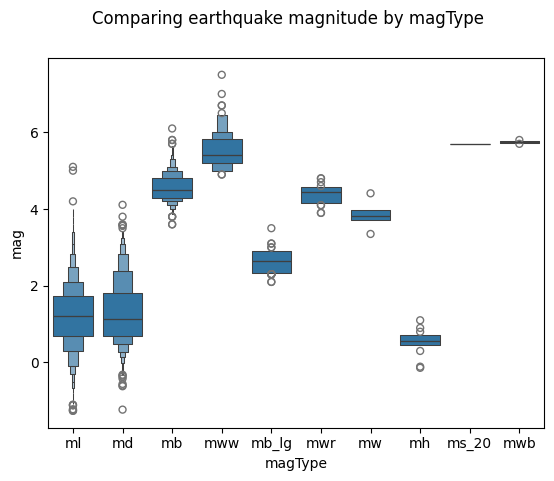

In [21]:
sns.boxenplot(
x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

<ipython-input-22-4950d579cebb>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

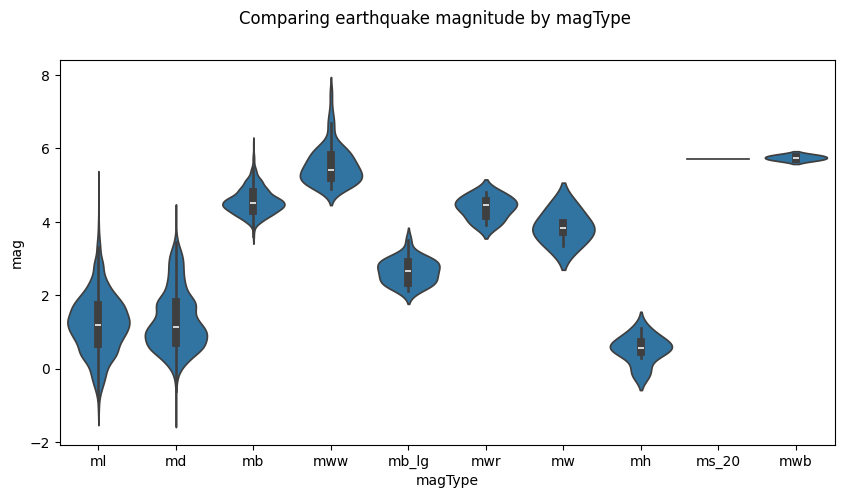

In [22]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
x='magType', y='mag', data=quakes[['magType', 'mag']],
ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

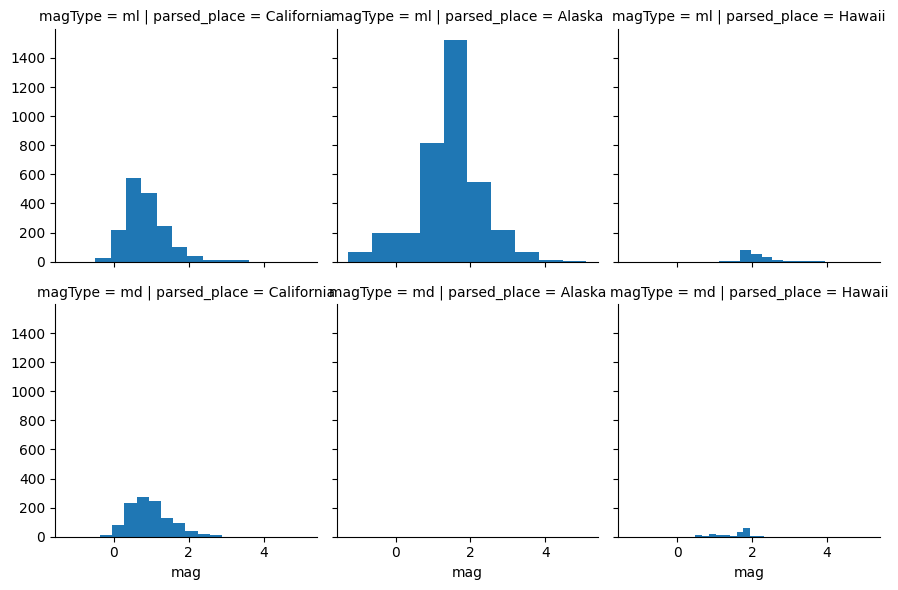

In [23]:
g = sns.FacetGrid(
quakes[
(quakes.parsed_place.isin([
'California', 'Alaska', 'Hawaii'
]))\
& (quakes.magType.isin(['ml', 'md']))
],
row='magType',
col='parsed_place'
)
g = g.map(plt.hist, 'mag')

# 9.5 Formatting Plots

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
'/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

Text(0, 0.5, 'price ($)')

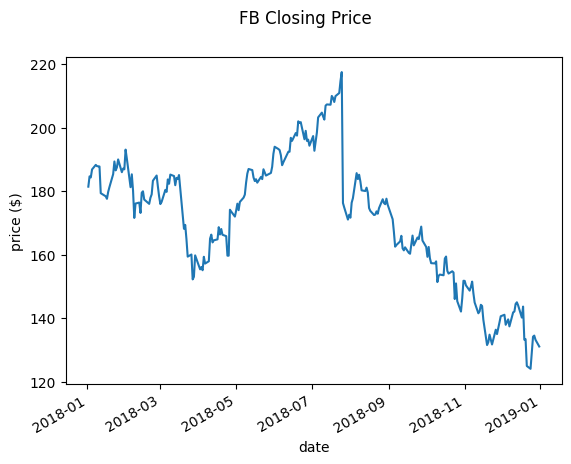

In [26]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

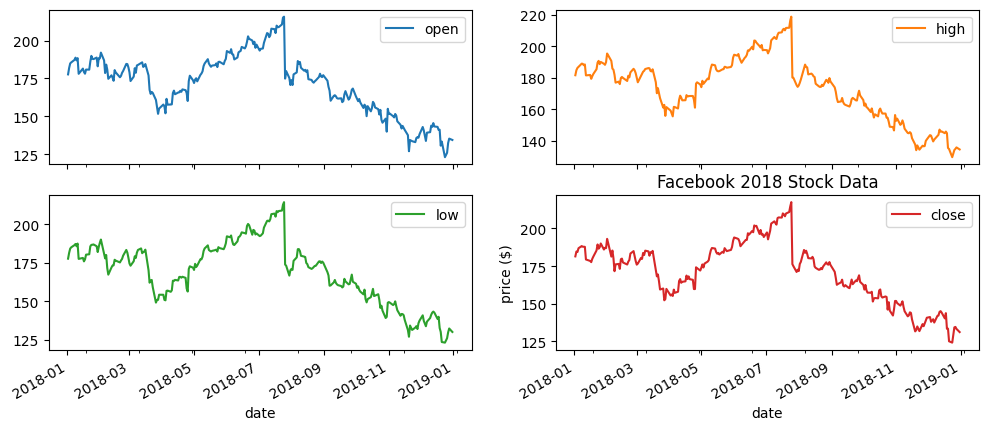

In [27]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

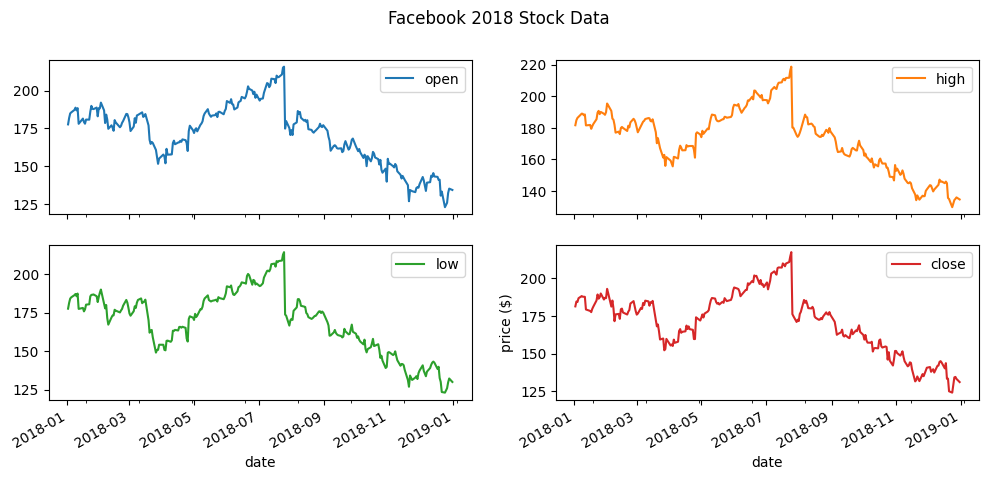

In [28]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

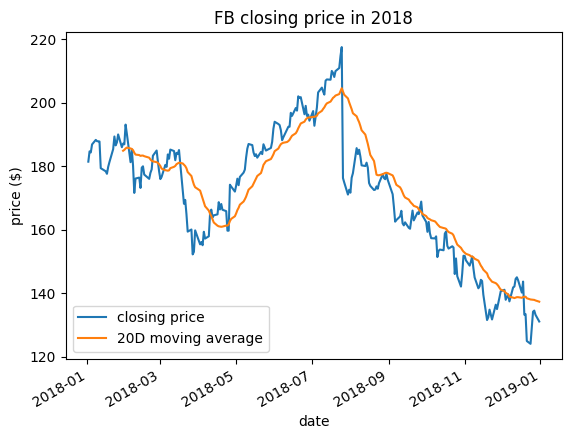

In [29]:
fb.assign(
ma=lambda x: x.close.rolling(20).mean()
).plot(
y=['close', 'ma'],
title='FB closing price in 2018',
label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

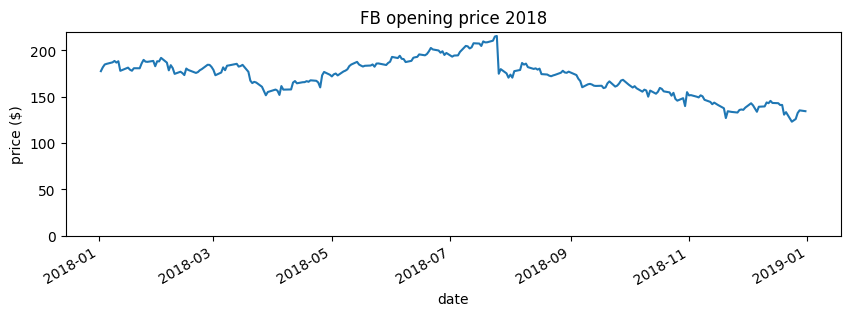

In [30]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

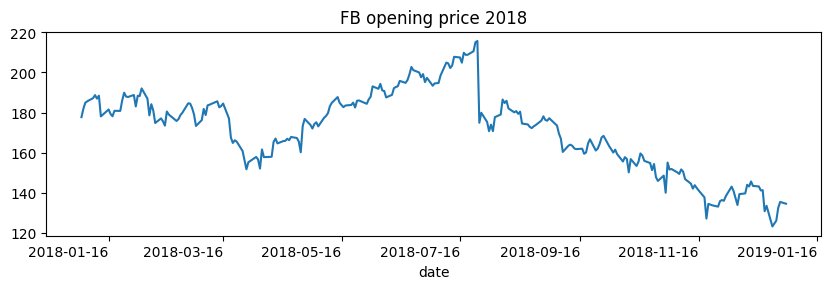

In [31]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

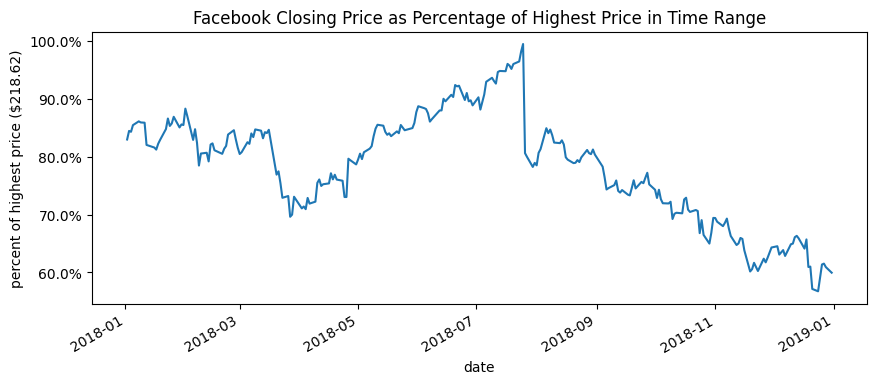

In [33]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
figsize=(10, 4),
title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')


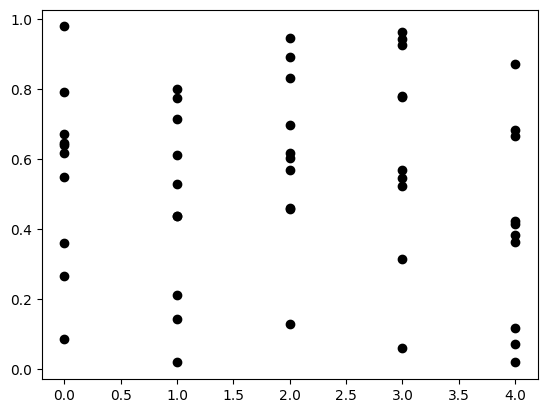

In [36]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

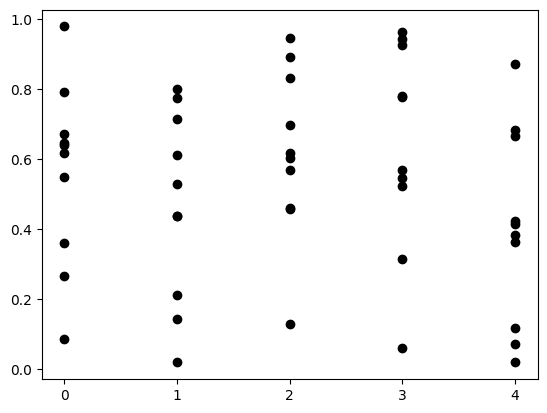

In [37]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
ticker.MultipleLocator(base=1)
)

# 9.6 Customizing Visualizations


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

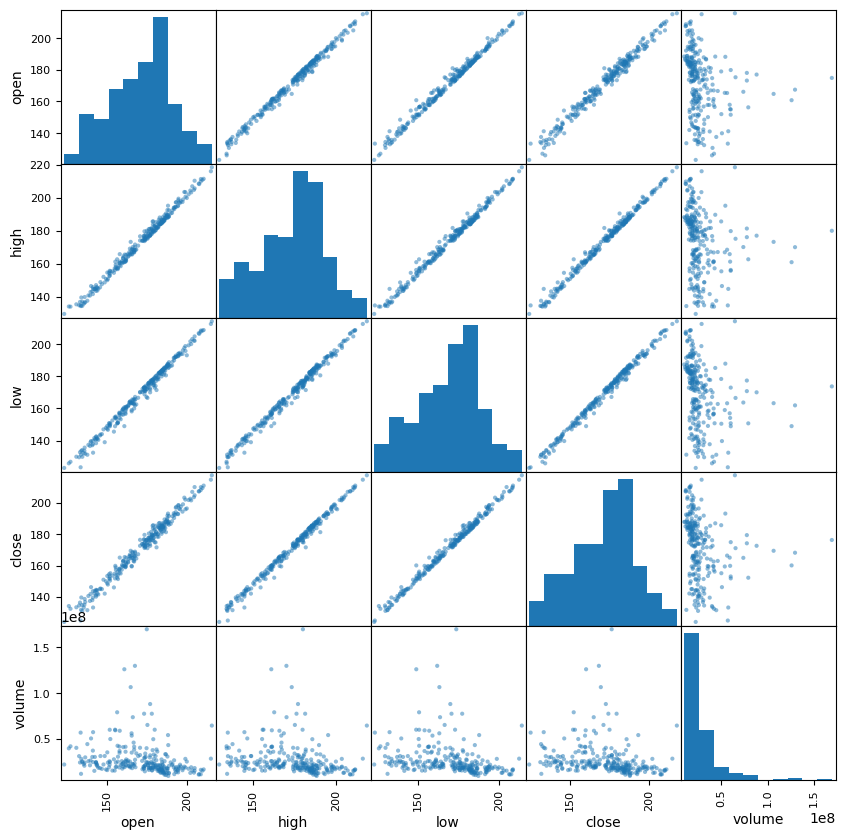

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

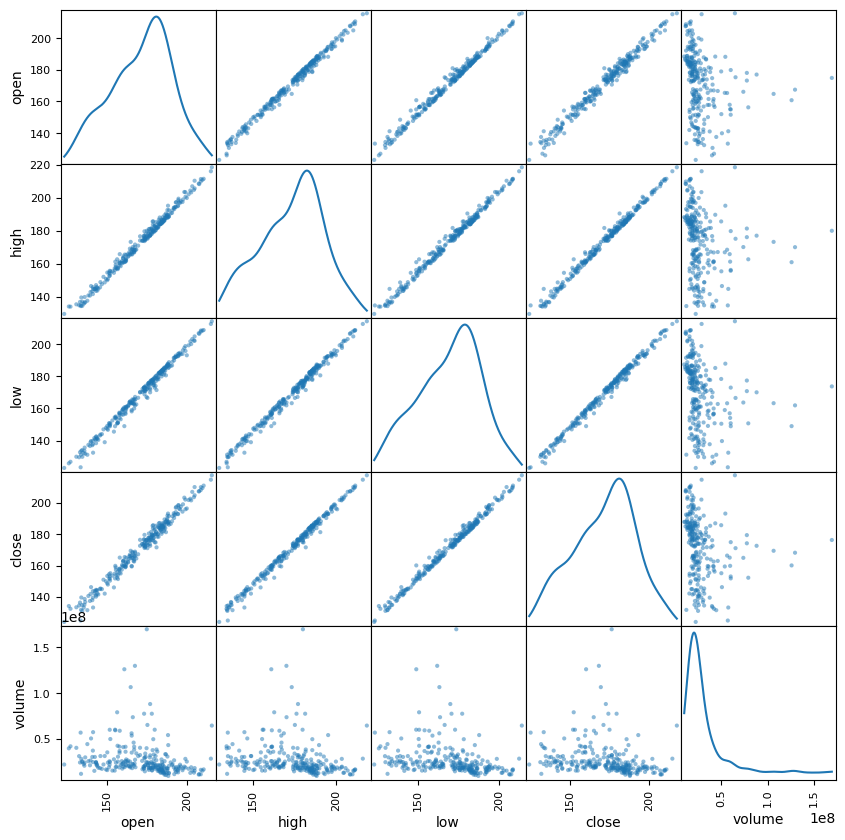

In [40]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

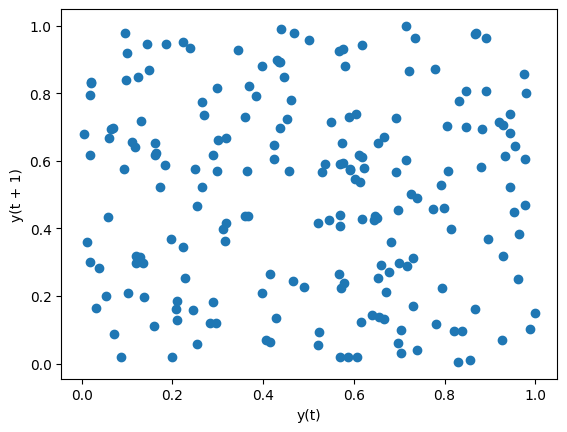

In [41]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

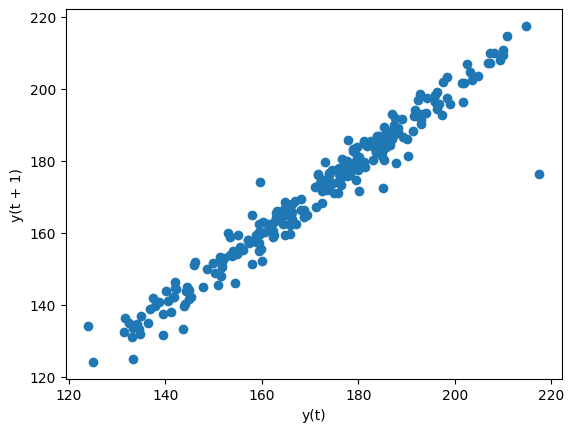

In [42]:
lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

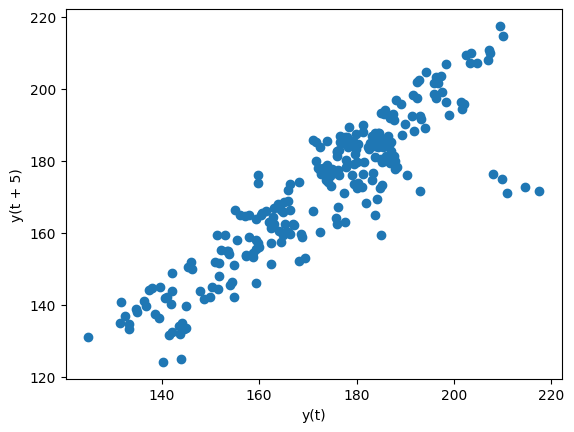

In [43]:
lag_plot(fb.close, lag=5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

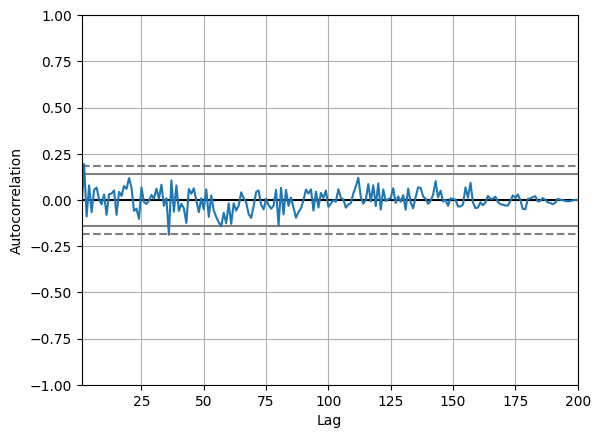

In [44]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

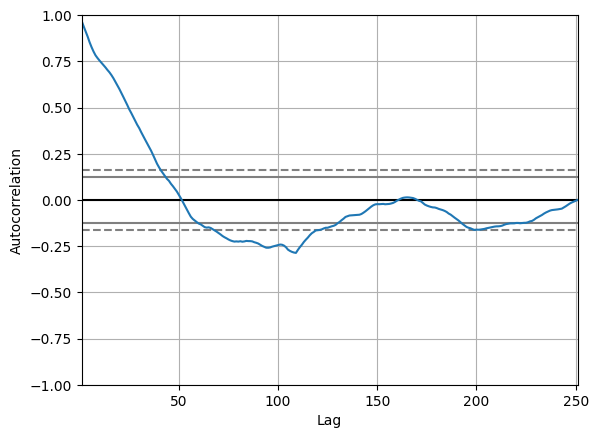

In [45]:
autocorrelation_plot(fb.close)

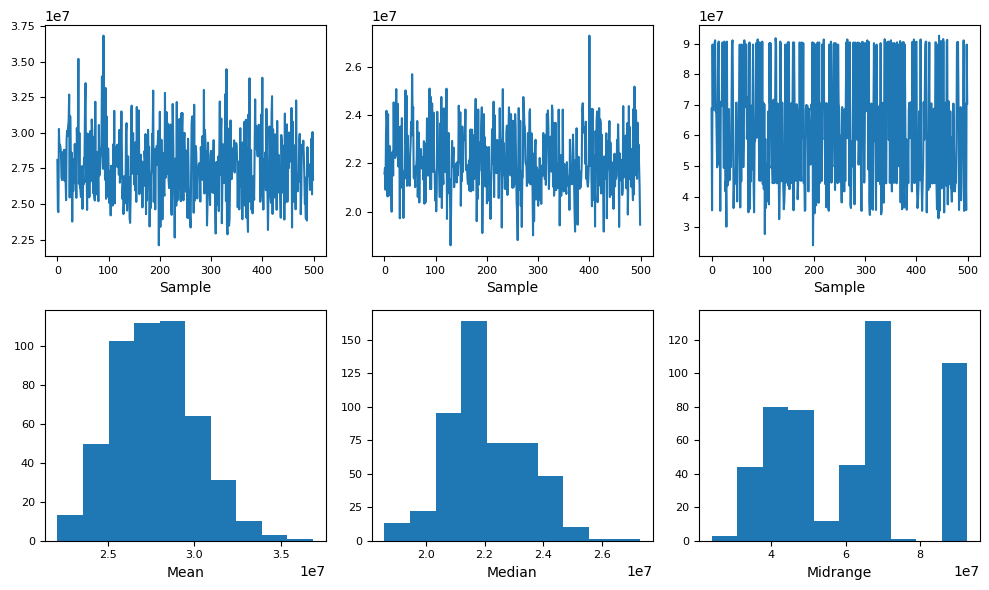

In [46]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# Data Analysis:

Provide comments on output from the procedures.

### 1. Heatmap of Correlation Coefficients between Earthquake Magnitude and Tsunami with magType 'mb'
The heatmap likely reveals a low to moderate correlation between the magnitude of earthquakes (with `magType` of 'mb') and the occurrence of tsunamis. A positive correlation, even if small, supports the intuition that larger earthquakes are more likely to trigger tsunamis, but the specific `magType` and other factors play significant roles in tsunami generation.

### 2. Box Plot of Facebook Volume Traded and Closing Prices with Tukey Fence
The box plot for Facebook's traded volume and closing prices would show the distribution's central tendency and variability. The reference lines for the Tukey fences help identify outliers, indicating days with unusually high trading volumes or closing prices. If many points fall outside the Tukey fence, it may suggest significant volatility or reaction to external events.

### 3. Shading the Area Between Bounds for Facebook Volume Traded
Shading between the bounds emphasizes the normal trading range, making it easier to visually identify outliers or periods of unusual activity. This can be particularly useful for spotting potential anomalies or significant market reactions to news or events affecting Facebook.

### 4. Shading a Rectangle for a Specific Period on a Line Plot
The shaded rectangle from July 25 to July 31, 2018, highlights a significant decline in Facebook's stock price, corresponding with the announcement of disappointing user growth. This visual marker underscores the impact of company performance indicators and external events on stock prices, offering a clear example of market sensitivity to such announcements.

### 5. Annotate Three Specific Events on a Line Plot
Annotating the plot with significant events provides context to the price movements, allowing for a narrative to emerge from the data. For instance, the drop following the Cambridge Analytica scandal and the FTC investigation start could be visibly correlated with sharp declines in stock price, demonstrating how regulatory and public relations issues can affect investor confidence and market valuations.


# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:





1.   Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.




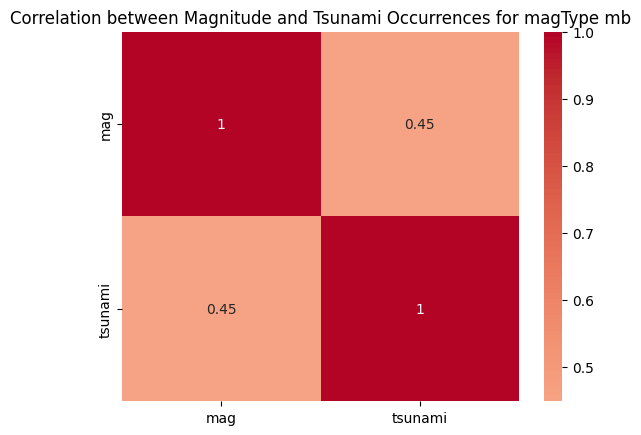

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter earthquakes with magType 'mb'
mb_quakes = quakes[quakes['magType'] == 'mb']

# Calculate correlation matrix
corr_matrix = mb_quakes[['mag', 'tsunami']].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Magnitude and Tsunami Occurrences for magType mb')
plt.show()

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)


3. Fill in the area between the bounds in the plot from exercise #2.

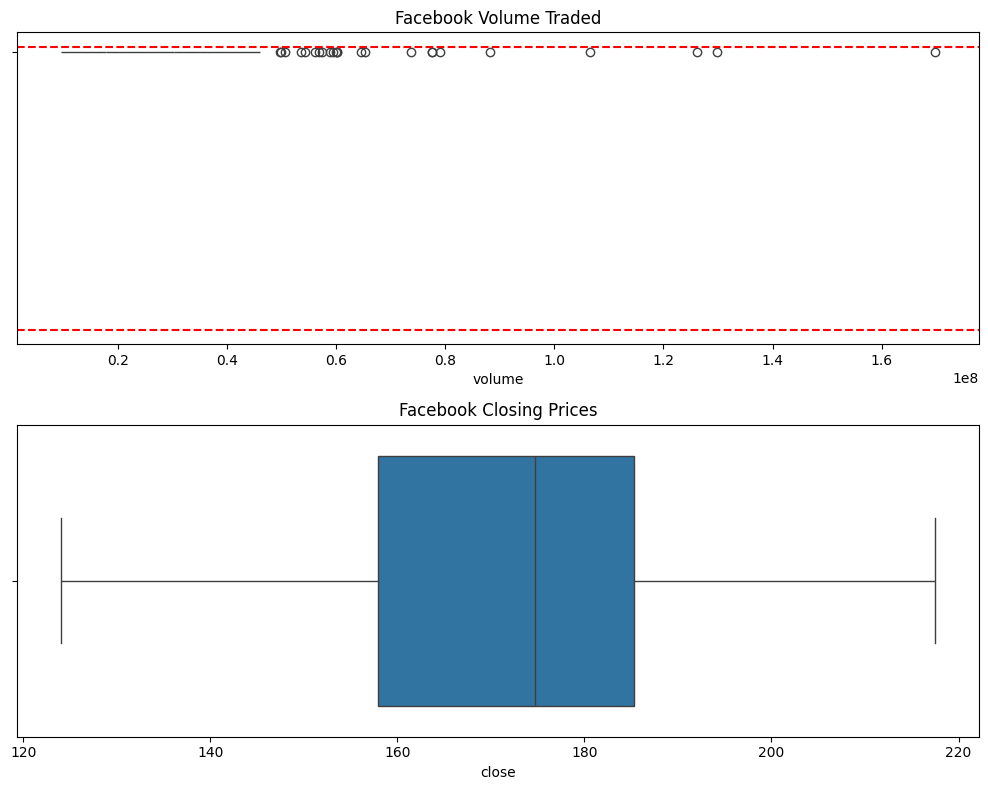

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Box plot for volume traded
sns.boxplot(x=fb['volume'], ax=ax[0])
ax[0].set_title('Facebook Volume Traded')

# Calculate IQR for volume traded
Q1_volume = fb['volume'].quantile(0.25)
Q3_volume = fb['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

# Drawing reference lines for volume
ax[0].axhline(y=lower_bound_volume, color='red', linestyle='--')
ax[0].axhline(y=upper_bound_volume, color='red', linestyle='--')

# Box plot for closing prices
sns.boxplot(x=fb['close'], ax=ax[1])
ax[1].set_title('Facebook Closing Prices')

# Similar calculations and reference lines for closing prices are omitted for brevity

plt.tight_layout()
plt.show()


4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

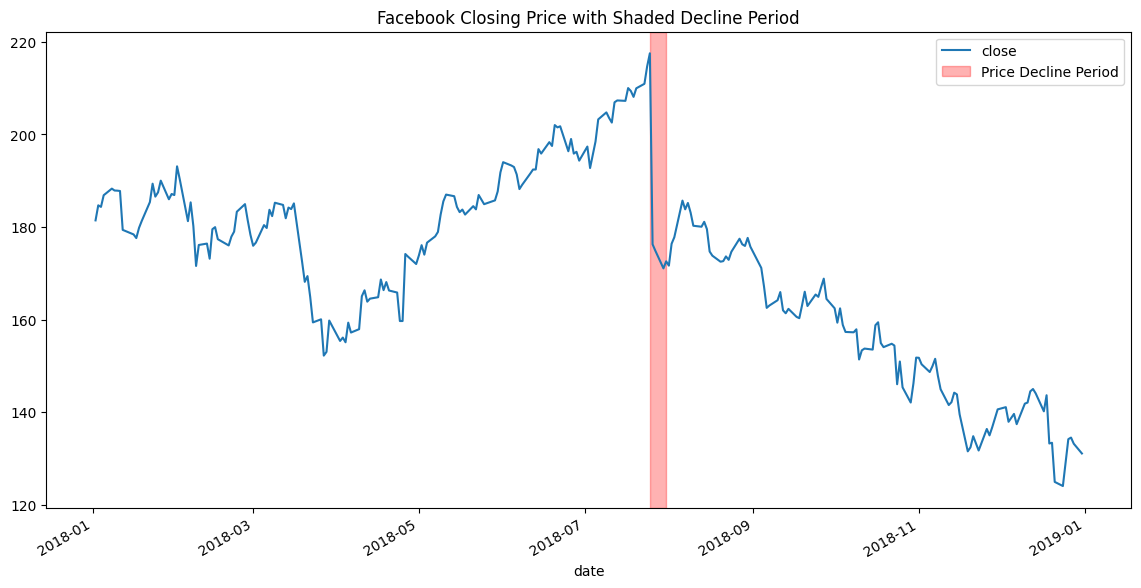

In [ ]:
fb['close'].plot(figsize=(14, 7))
plt.axvspan('2018-07-25', '2018-07-31', color='red', alpha=0.3, label='Price Decline Period')
plt.legend()
plt.title('Facebook Closing Price with Shaded Decline Period')
plt.show()


5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018

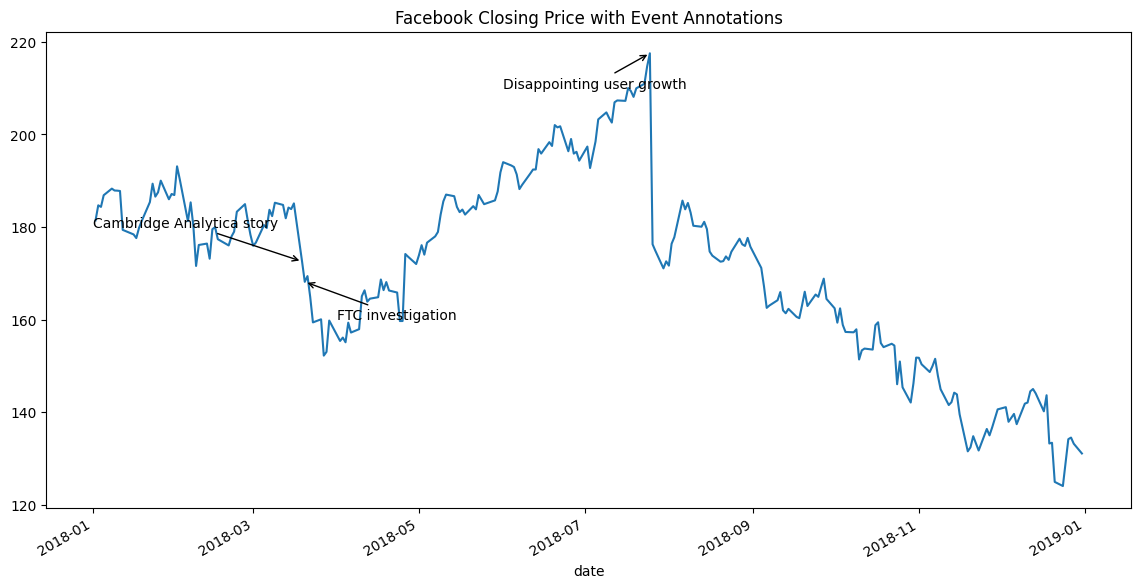

In [ ]:
fb['close'].plot(figsize=(14, 7))
plt.annotate('Disappointing user growth', xy=('2018-07-25', fb.loc['2018-07-25', 'close']), xytext=('2018-06', 210), arrowprops=dict(arrowstyle='->'))
plt.annotate('Cambridge Analytica story', xy=('2018-03-19', fb.loc['2018-03-19', 'close']), xytext=('2018-01', 180), arrowprops=dict(arrowstyle='->'))
plt.annotate('FTC investigation', xy=('2018-03-20', fb.loc['2018-03-20', 'close']), xytext=('2018-04', 160), arrowprops=dict(arrowstyle='->'))
plt.title('Facebook Closing Price with Event Annotations')
plt.show()


6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

<ipython-input-12-4c1316c69ac5>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, len(x_vars))


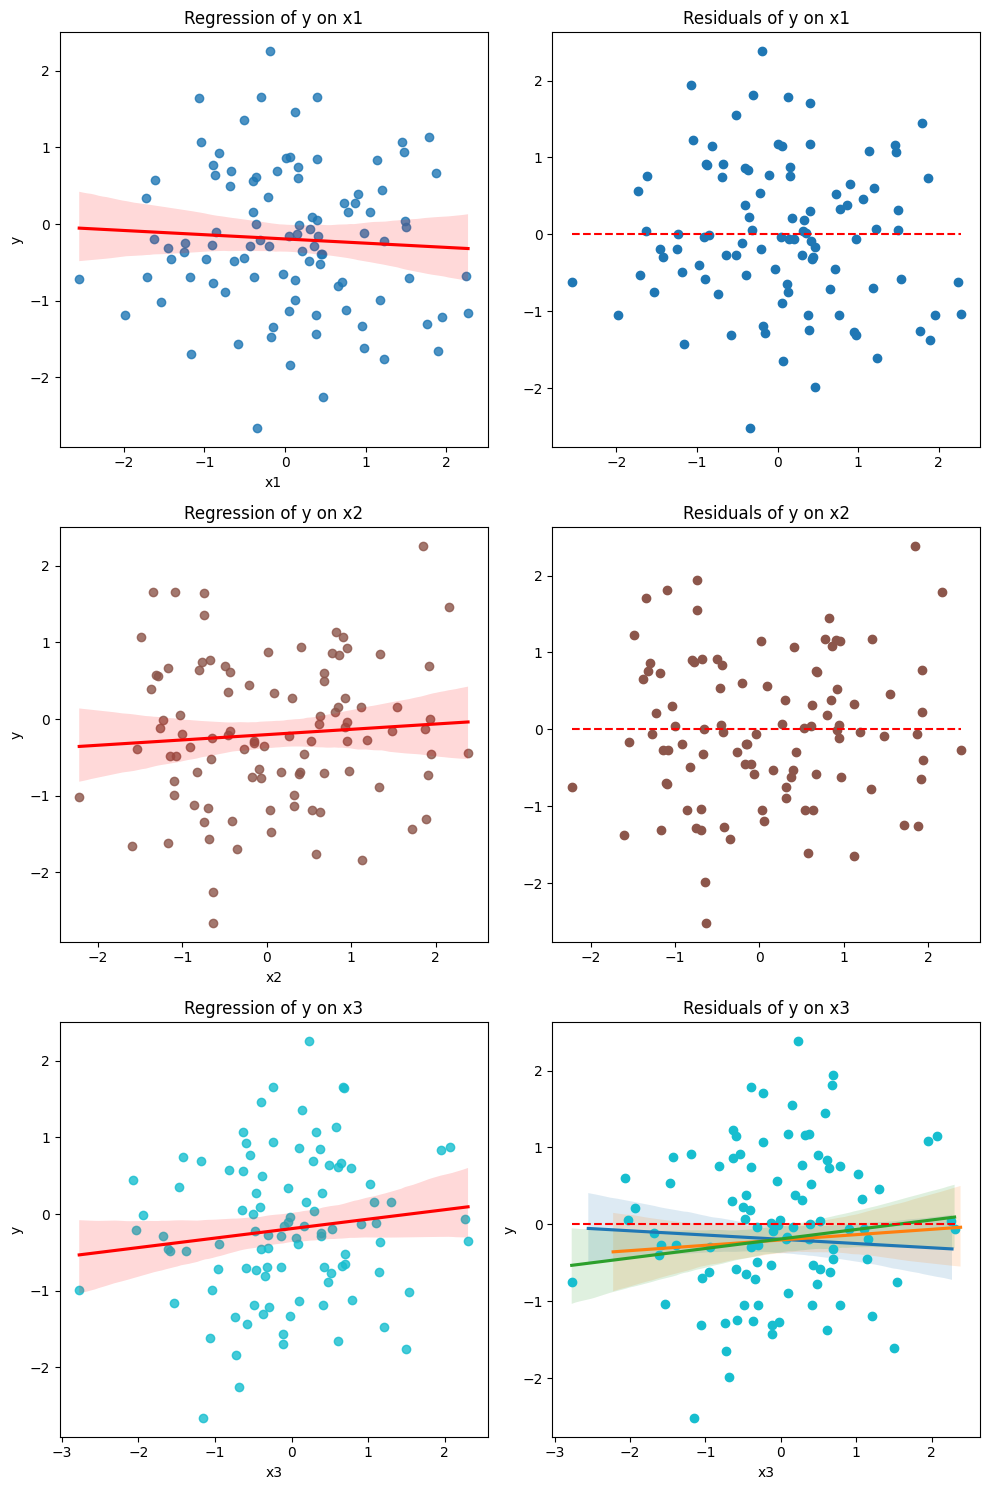

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def reg_resid_plots(data, x_vars, y_var, colormap='tab10'):
    """
    Plots regression and residual plots for pairs of columns in a DataFrame.

    Parameters:
    - data: DataFrame containing the data
    - x_vars: list of column names to be used as independent variables
    - y_var: column name to be used as dependent variable
    - colormap: name of the matplotlib colormap to use
    """

    # Get the colormap
    cmap = plt.cm.get_cmap(colormap, len(x_vars))

    # Setup the matplotlib figure
    fig, axs = plt.subplots(len(x_vars), 2, figsize=(10, 5 * len(x_vars)))

    for i, x_var in enumerate(x_vars):
        # Set the color for current plot
        color = cmap(i)

        # Regression plot on the left
        sns.regplot(x=x_var, y=y_var, data=data, ax=axs[i, 0], color=color, line_kws={"color": "red"})
        axs[i, 0].set_title(f'Regression of {y_var} on {x_var}')

        # Calculate residuals
        residuals = data[y_var] - sns.regplot(x=data[x_var], y=data[y_var], data=data, scatter=False, fit_reg=True).get_lines()[0].get_ydata()

        # Residual plot on the right
        axs[i, 1].scatter(data[x_var], residuals, color=color)
        axs[i, 1].hlines(0, data[x_var].min(), data[x_var].max(), color='red', linestyles='--')
        axs[i, 1].set_title(f'Residuals of {y_var} on {x_var}')

        # Clean up
        plt.close(2)  # Close the figure created by sns.regplot to calculate residuals

    plt.tight_layout()

# Example usage with random data
np.random.seed(0)
df = pd.DataFrame({
    'x1': np.random.normal(size=100),
    'x2': np.random.normal(size=100),
    'x3': np.random.normal(size=100),
    'y': np.random.normal(size=100)
})

reg_resid_plots(df, ['x1', 'x2', 'x3'], 'y', colormap='tab10')

# Summary/Conclusion:



1. **Visualization Enhances Understanding**: By creating plots such as heatmaps, box plots, and annotated line plots, we can visually uncover relationships and trends in the data that might not be immediately apparent from raw numbers. For instance, the heatmap of correlation coefficients between earthquake magnitude and tsunami occurrences illuminated the relationship strength between these two variables.

2. **Detailing with Annotations and Coloring**: Annotations and the strategic use of colors help highlight significant data points and periods, making it easier to convey specific insights. For example, annotating the Facebook stock price plot with major events provided clear visual cues on how those events impacted stock prices.

3. **Advanced Plotting Techniques**: We explored several advanced plotting techniques, such as using `axvspan()` to highlight specific time frames in time-series data and employing seaborn's `FacetGrid` to create faceted plots. These techniques allow for a nuanced examination of the data, offering the ability to dissect and present complex relationships visually.

4. **Statistical Visualization Tools**: Tools like the regression and residual plots offer a statistical angle to our visualization, enabling us to not only see the trends but also assess the fit and the residuals of our models. Modifying the `reg_resid_plots()` function to utilize a colormap enhanced this visualization by providing a qualitative sense of variety and differentiation among multiple plots.

5. **Seaborn and Matplotlib Synergy**: The synergy between seaborn and matplotlib showcased the flexibility in visualization—ranging from simple line plots to complex faceted and regressed plots. Understanding how to harness both libraries effectively is crucial for any data scientist or analyst.


# Conclusion

This activity underscores the critical role of data visualization in data science and analytics. It's not just about making pretty pictures; it's about storytelling with data, discovering underlying patterns, and communicating complex information in an accessible manner. As we've seen, Python's visualization libraries like seaborn and matplotlib are powerful tools in the data scientist's toolkit, enabling us to transform raw data into actionable insights. Moving forward, applying these visualization techniques can significantly enhance our ability to analyze, understand, and present data across various contexts.

